# Homework - Week 5 - Building Functions & Visualizing Distribution

### Choose 4 Stocks of your choice, Create a notebook with the same visualizations. Provide similar explanations in regard to the meaning of statistics and the shape of each stocks distribution.

In [30]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(list_obj):
    max_count = 0
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    for value in list_obj:
        counter_dict[value] += 1
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    list_mean = mean(list_obj)
    n = len(list_obj)
    sum_sq_diff = 0
    for val in list_obj:
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        variance_ = sum_sq_diff / n
    else:
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    if n1 == n2:
        n = n1
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n - 1)
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    
def correlation(list_obj1, list_obj2):
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

In [31]:
def gather_statistics(df, sample = False):
    #create a dict of dict with an entry for ea. column of data
    dct = {key: {} for key in df}
    #call each column of data & key
    #df.items() makes a list of tuples
    #    tuple index 0 refers to key
    #    index 1 referes to obj pointed to by key
    for key, val in df.items():
        val.dropna(axis = 0, inplace = True) #true alters the obj. itself
        #call each function that takes one parameter
        dct[key]["mean"] = round(mean(val), 3)
        dct[key]["median"] = round(median(val), 3)
        dct[key]["variance"] = round(variance(val), 3)
        dct[key]["SD"] = round(SD(val), 3)
        dct[key]["skewness"] = round(skewness(val), 3)
        dct[key]["kurtosis"] = round(kurtosis(val), 3)
    
    #Pandas data frame
    import pandas as pd
    stats_df = pd.DataFrame(dct)
    return stats_df

In [32]:
!pip install pandas-datareader

In [33]:
import pandas_datareader.data as web
import datetime

In [34]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()
print(start, end)

2012-01-01 00:00:00 2021-10-05 20:03:35.091408


In [35]:
data_dct = {"NTAP": {},
           "CINF": {},
           "LMT": {},
           "CI": {}}
for stock in data_dct:
    data_dct[stock] = web.DataReader(stock, 'yahoo', start, end)
data_dct[stock]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,43.480000,42.820000,42.820000,43.230000,2292700.0,42.522858
2012-01-04,43.430000,42.720001,43.020000,43.209999,1773700.0,42.503189
2012-01-05,43.389999,42.759998,43.150002,43.209999,2206200.0,42.503189
2012-01-06,44.340000,43.119999,43.189999,43.610001,2436600.0,42.896648
2012-01-09,43.910000,43.200001,43.740002,43.779999,2296100.0,43.063869
...,...,...,...,...,...,...
2021-09-29,205.910004,203.190002,203.690002,203.929993,1457500.0,203.929993
2021-09-30,207.550003,200.100006,206.039993,200.160004,1634000.0,200.160004
2021-10-01,203.770004,198.860001,201.000000,202.600006,1786200.0,202.600006


In [36]:
data_dct.values()

dict_values([                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2012-01-03  37.439999  36.689999  37.000000  36.779999   4300200.0  30.162254
2012-01-04  36.009998  35.119999  35.709999  35.639999   7319600.0  29.227375
2012-01-05  35.480000  34.410000  35.259998  34.669998   9831700.0  28.431906
2012-01-06  35.529999  34.560001  34.959999  35.330002  11554000.0  28.973150
2012-01-09  35.660000  34.959999  35.509998  35.040001   4949600.0  28.735331
...               ...        ...        ...        ...         ...        ...
2021-09-29  92.540001  90.190002  92.019997  90.330002   1241100.0  90.330002
2021-09-30  91.739998  89.400002  91.110001  89.760002   1364900.0  89.760002
2021-10-01  91.300003  89.269997  90.099998  90.580002   1105000.0  90.580002
2021-10-04  91.099998  89.070000  90.779999  89.540001   1012900.0  89.540001
2021-10-05  90.775002  88.864998  89.809998  90.300

In [37]:
for val in data_dct.values():
    (val["Close"])

close_data = pd.concat((val["Close"] for val in data_dct.values()),
                      keys = data_dct.keys(),
                      axis = 1)

close_data

,NTAP,CINF,LMT,CI
Date,,,,
2012-01-03,36.779999,30.600000,82.019997,43.230000
2012-01-04,35.639999,30.450001,80.910004,43.209999
2012-01-05,34.669998,30.879999,80.070000,43.209999
2012-01-06,35.330002,30.670000,79.980003,43.610001
2012-01-09,35.040001,30.950001,80.040001,43.779999
...,...,...,...,...
2021-09-29,90.330002,116.349998,350.290009,203.929993
2021-09-30,89.760002,114.220001,345.100006,200.160004
2021-10-01,90.580002,114.790001,347.799988,202.600006


In [38]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 36}) #formatting

<ipython-input-39-08454cc06eaf>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y)


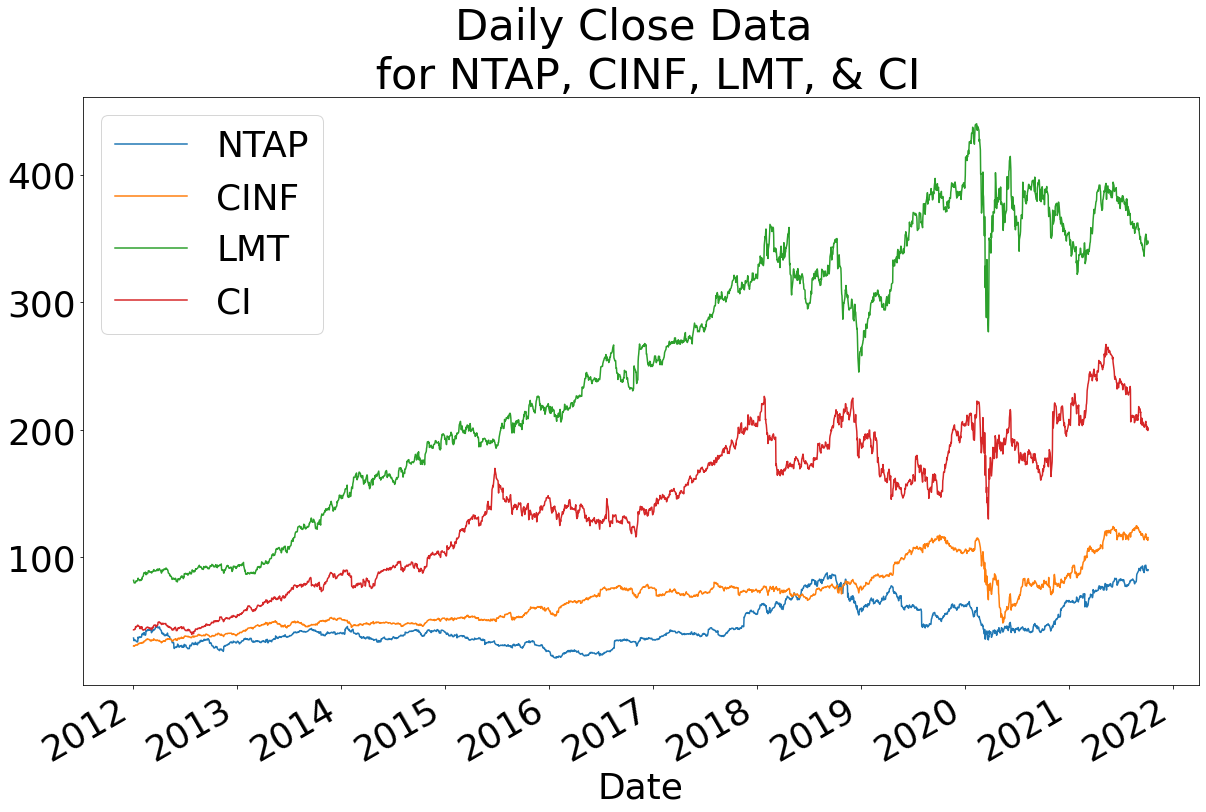

In [39]:
fig, ax = plt.subplots(figsize = (20, 12))
close_data.plot.line(ax = ax, legend = True)
plt.title("Daily Close Data \n for NTAP, CINF, LMT, & CI") #title

#adjust y values
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y)
                    if y >= 1 
                   else round(y,1) for y in y_vals] )
#format margins
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.01

plt.show()
plt.close()

In [40]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

<ipython-input-41-a2d39df7ea04>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y)


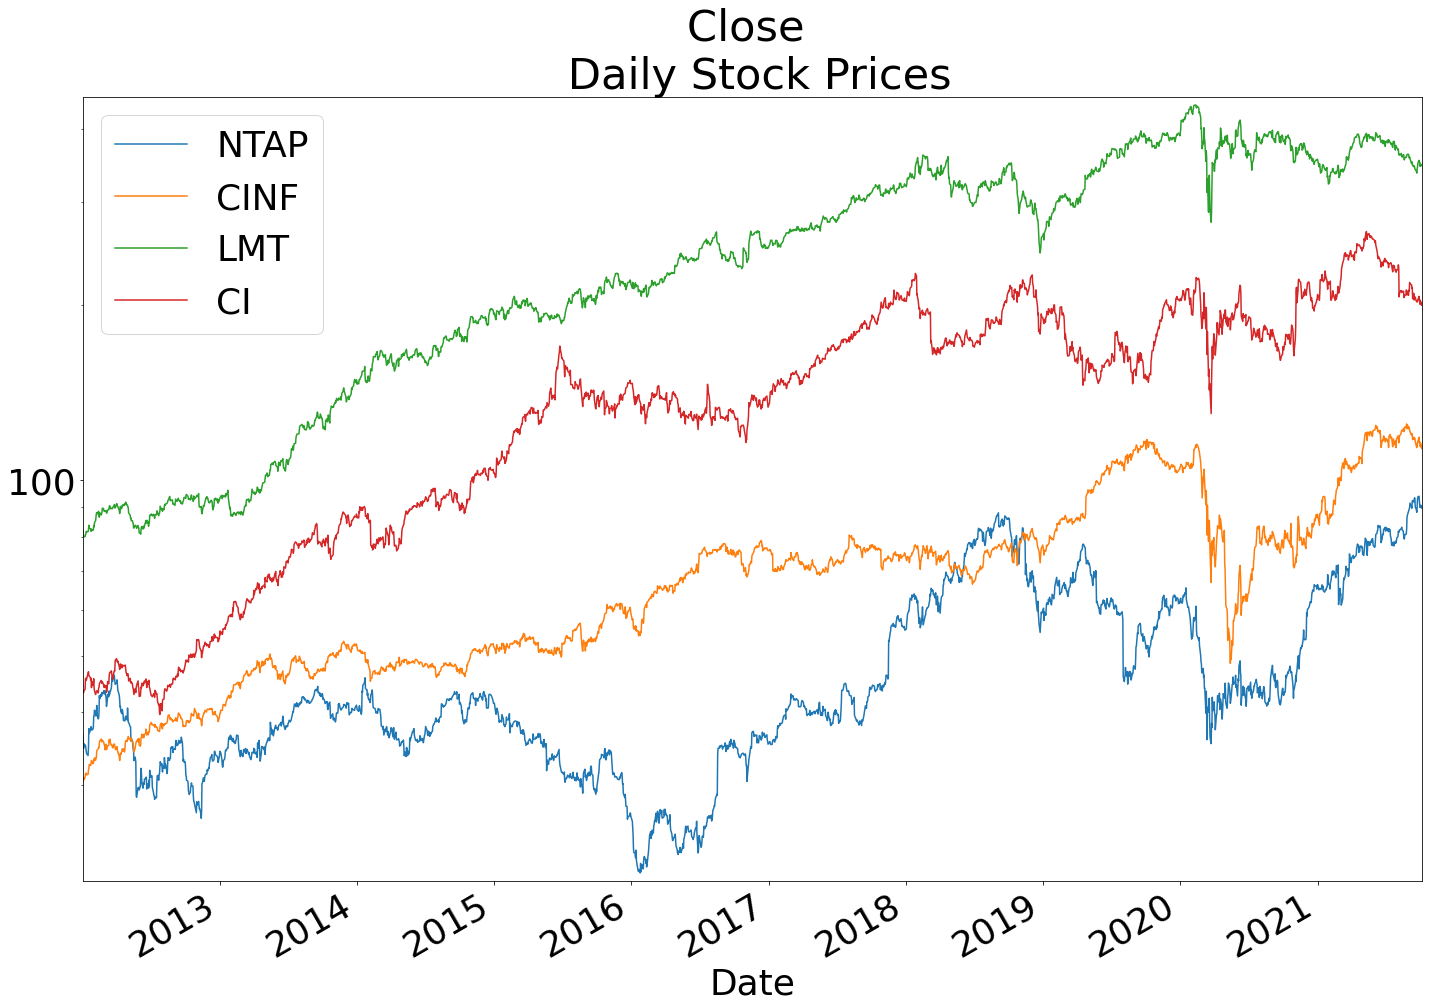

In [41]:
fig, ax = plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Close \n Daily Stock Prices") #title

ax.set_yscale("log") # log normalizes the distribution

#axis
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y)
                    if y >= 1 
                   else round(y,1) for y in y_vals] )
#Remove margins
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.01

plt.show()
plt.close()

In [42]:
import numpy as np

In [48]:
price_change_data = close_data.pct_change()
price_change_data

,NTAP,CINF,LMT,CI
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,-0.030995,-0.004902,-0.013533,-0.000463
2012-01-05,-0.027217,0.014121,-0.010382,0.000000
2012-01-06,0.019037,-0.006800,-0.001124,0.009257
2012-01-09,-0.008208,0.009129,0.000750,0.003898
...,...,...,...,...
2021-09-29,-0.016120,0.005444,-0.005282,0.003198
2021-09-30,-0.006310,-0.018307,-0.014816,-0.018487
2021-10-01,0.009135,0.004990,0.007824,0.012190


<ipython-input-49-22896e6b5261>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y*100)) + "%" for y in y_vals])


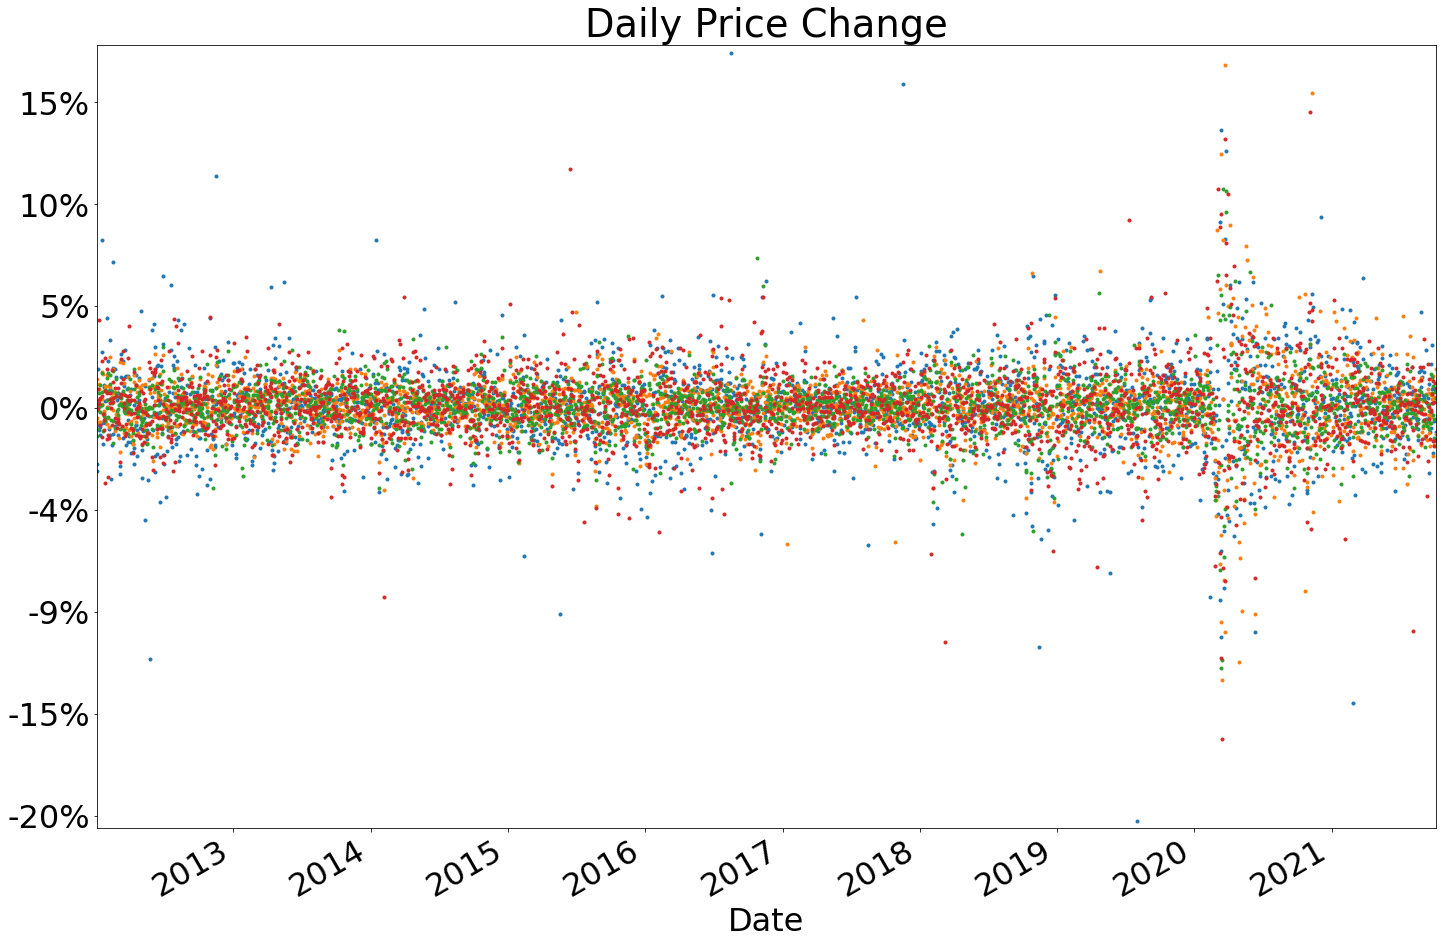

In [49]:
plt.rcParams.update({"font.size": 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].plot.line(ls = "", 
                                    marker = ".",
                                    ax = ax)
#y axis
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y*100)) + "%" for y in y_vals])   

plt.title("Daily Price Change")
plt.show()
plt.close()

In [51]:
stats_df = gather_statistics(price_change_data,
                             sample = True)
stats_df

,NTAP,CINF,LMT,CI
mean,0.001,0.001,0.001,0.001
median,0.001,0.001,0.001,0.001
variance,0.000,0.000,0.000,0.000
SD,0.021,0.016,0.013,0.018
skewness,-0.170,0.176,-0.252,-0.085
kurtosis,14.650,22.398,17.330,13.880


<ipython-input-53-318ecaa10740>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])


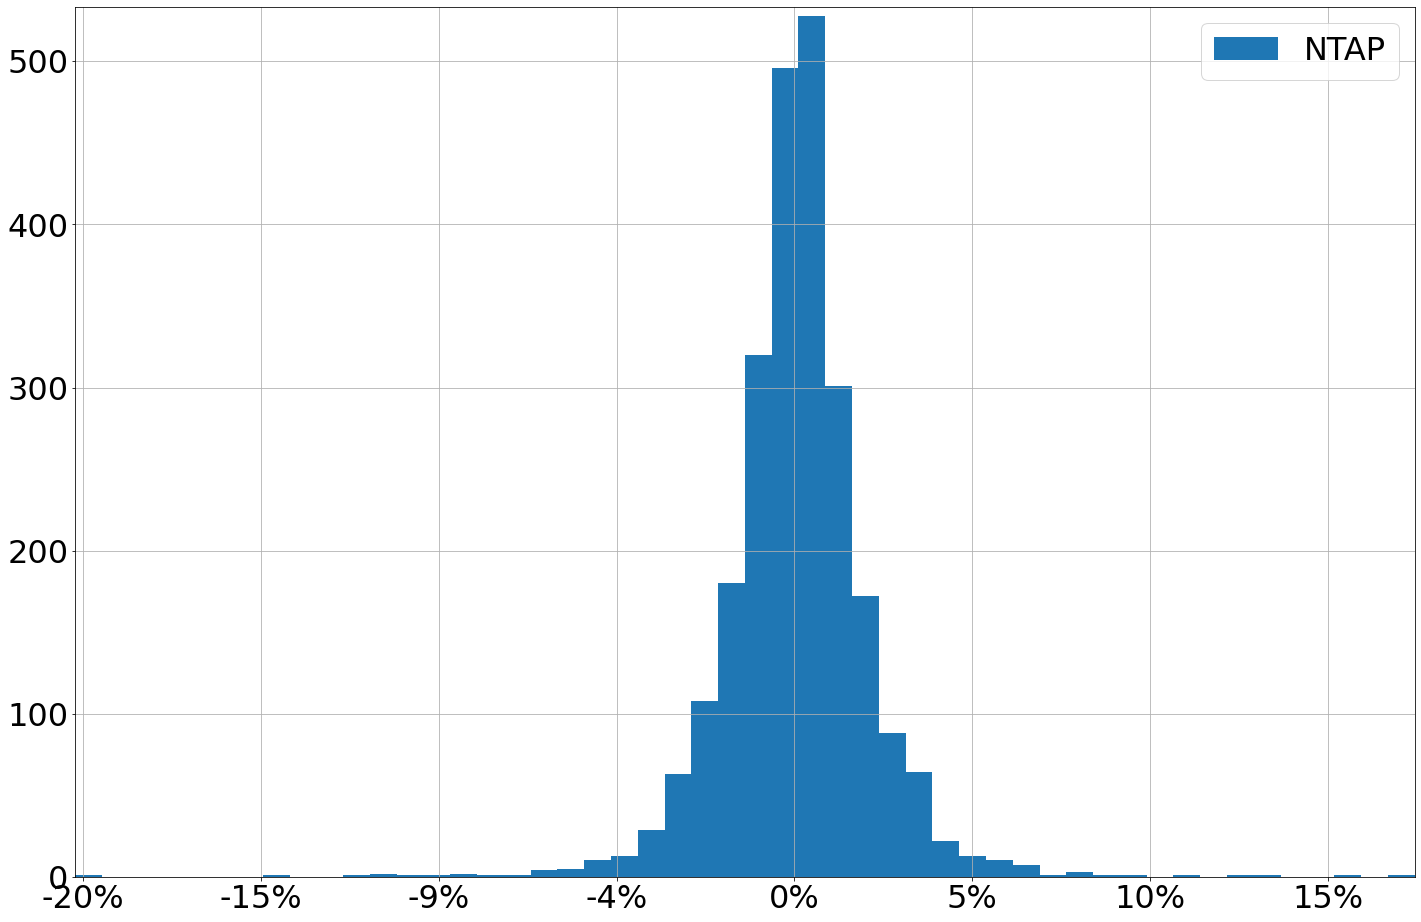

In [53]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["NTAP"].hist(bins = 50,
                             label = "NTAP")

#x axis
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])

plt.legend()
plt.show()

<ipython-input-54-2c8c0959b976>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])


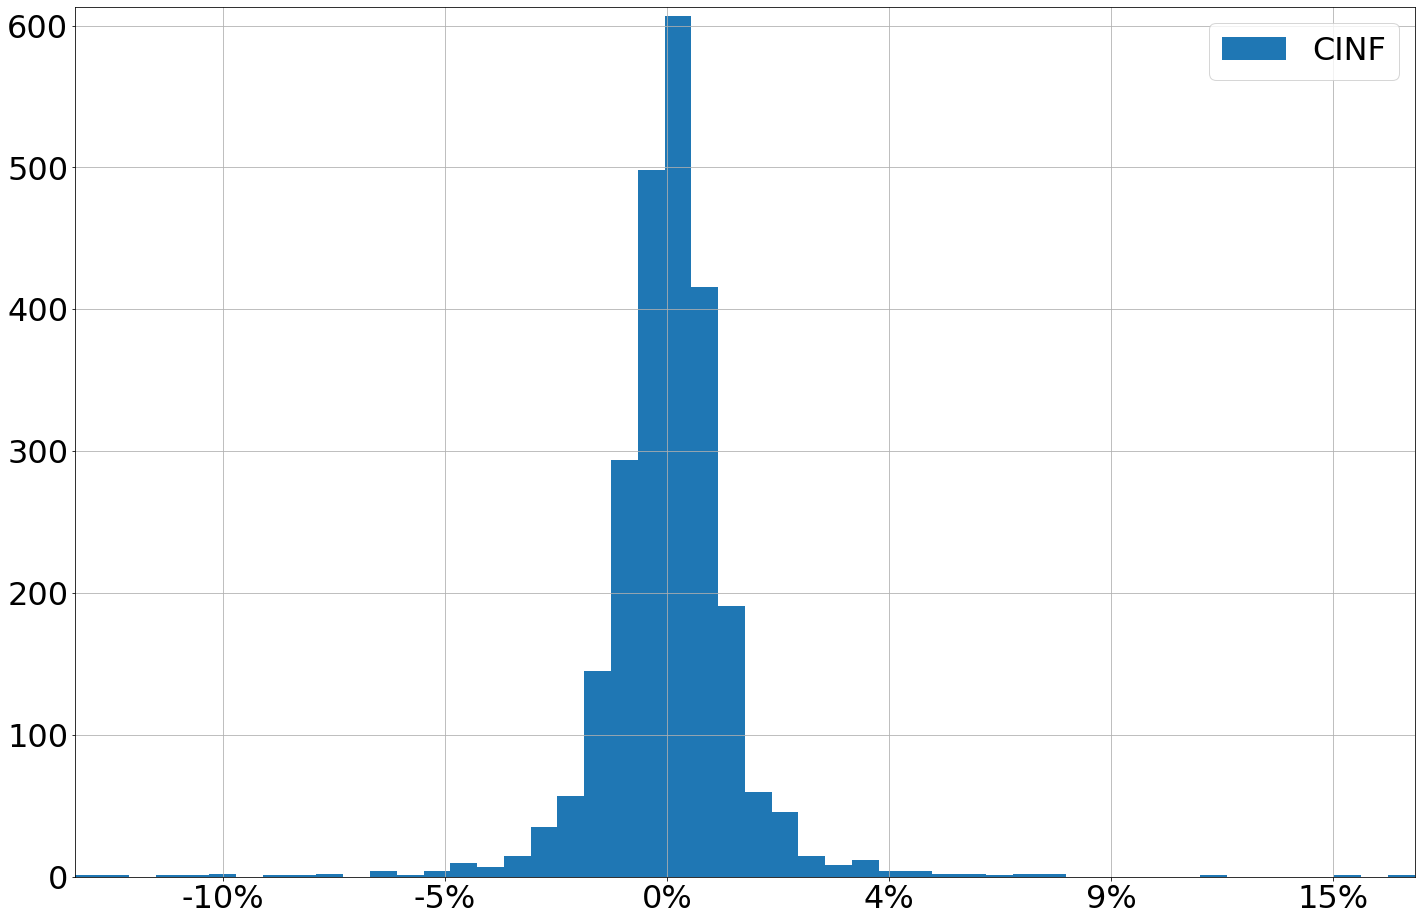

In [54]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["CINF"].hist(bins = 50,
                             label = "CINF")

#x axis
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])

plt.legend()
plt.show()

<ipython-input-58-ff7d07a3ab05>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
<ipython-input-58-ff7d07a3ab05>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
<ipython-input-58-ff7d07a3ab05>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 1)) + "%" for y in y_vals])


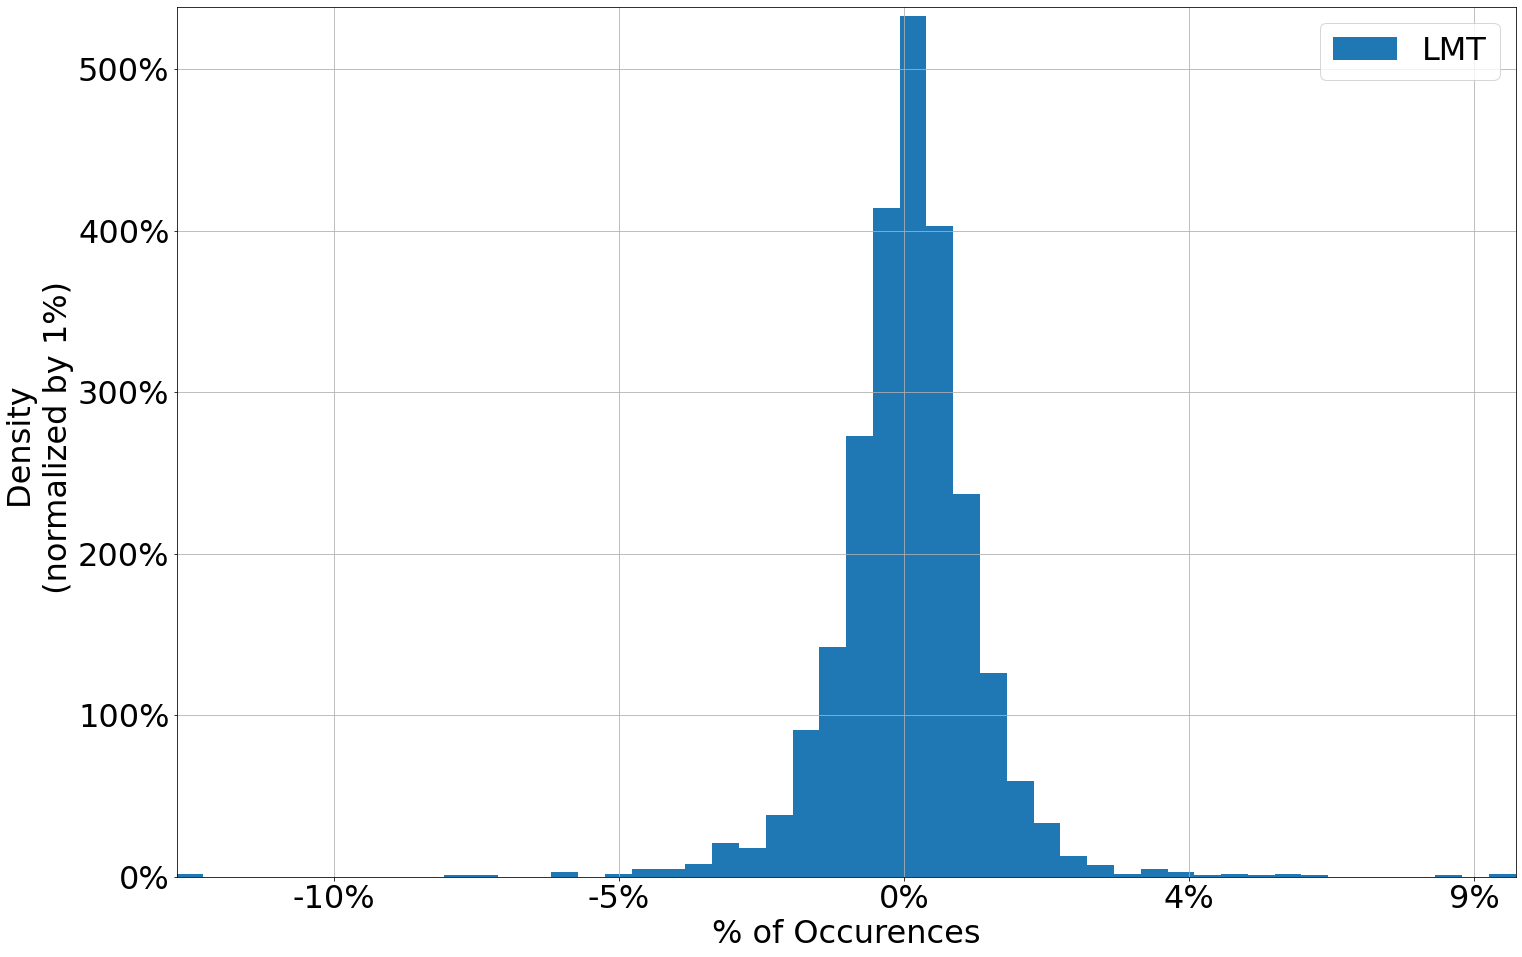

In [58]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["LMT"].hist(bins = 50,
                             label = "LMT")

#x axis
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])

#x axis
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
#y axis
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 1)) + "%" for y in y_vals])
#labels
ax.set_xlabel("% of Occurences")
ax.set_ylabel("Density \n (normalized by 1%)")

plt.legend()
plt.show()

<ipython-input-59-30d00f089d69>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
<ipython-input-59-30d00f089d69>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
<ipython-input-59-30d00f089d69>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 1)) + "%" for y in y_vals])


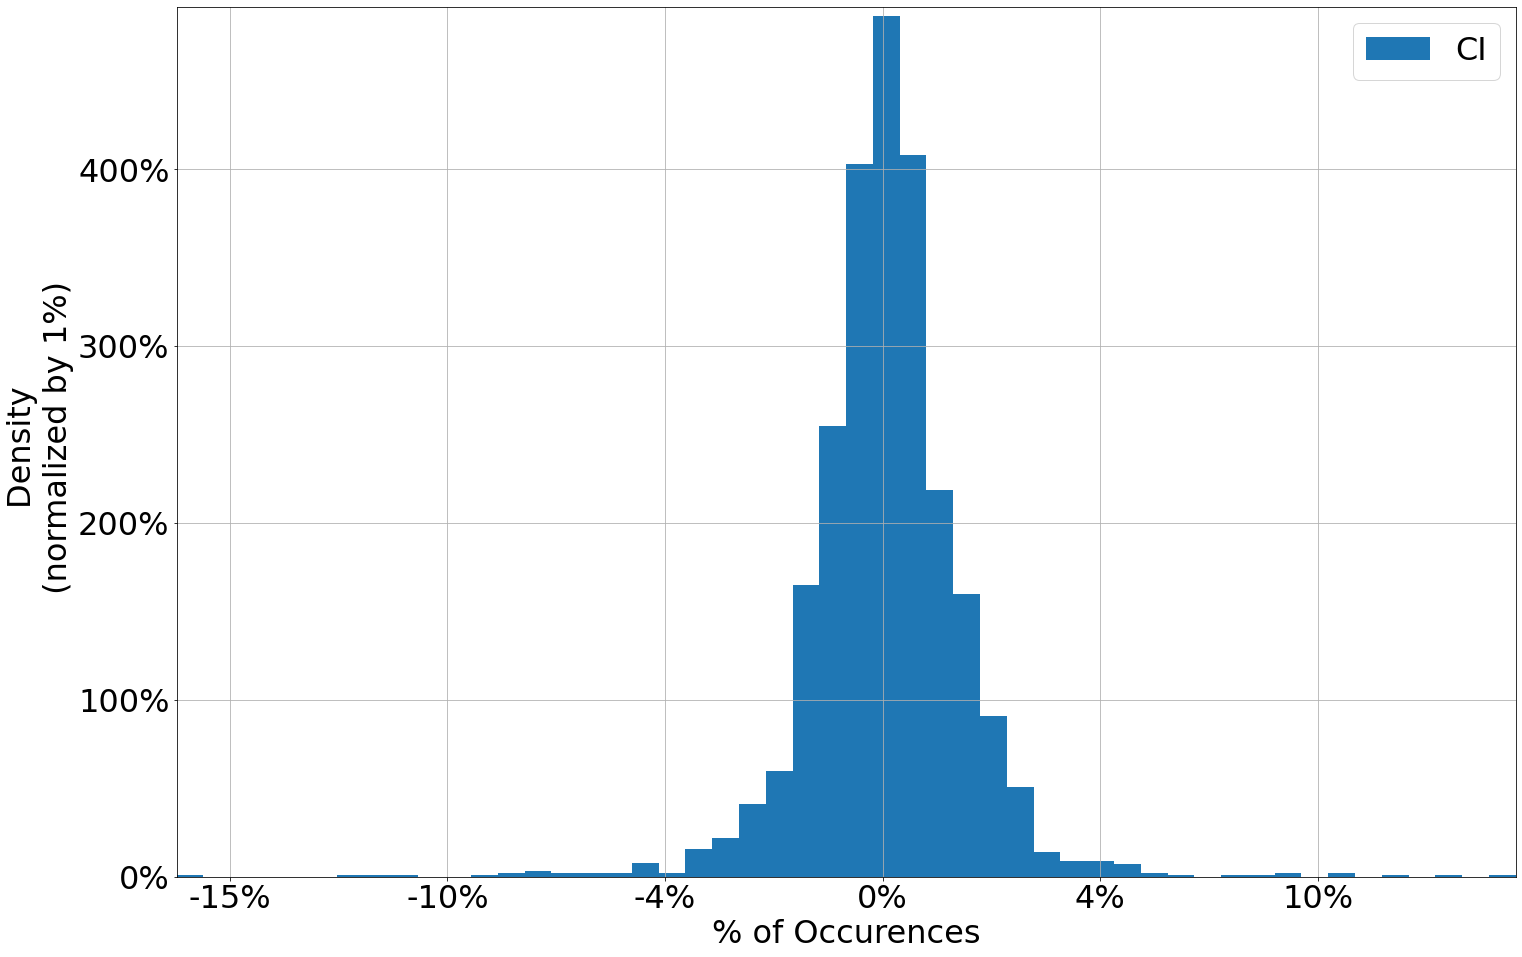

In [59]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["CI"].hist(bins = 50,
                             label = "CI")

#x axis
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])

#x axis
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
#y axis
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 1)) + "%" for y in y_vals])
#labels
ax.set_xlabel("% of Occurences")
ax.set_ylabel("Density \n (normalized by 1%)")

plt.legend()
plt.show()

array([<AxesSubplot:title={'center':'NTAP'}>,
       <AxesSubplot:title={'center':'CINF'}>,
       <AxesSubplot:title={'center':'LMT'}>,
       <AxesSubplot:title={'center':'CI'}>], dtype=object)

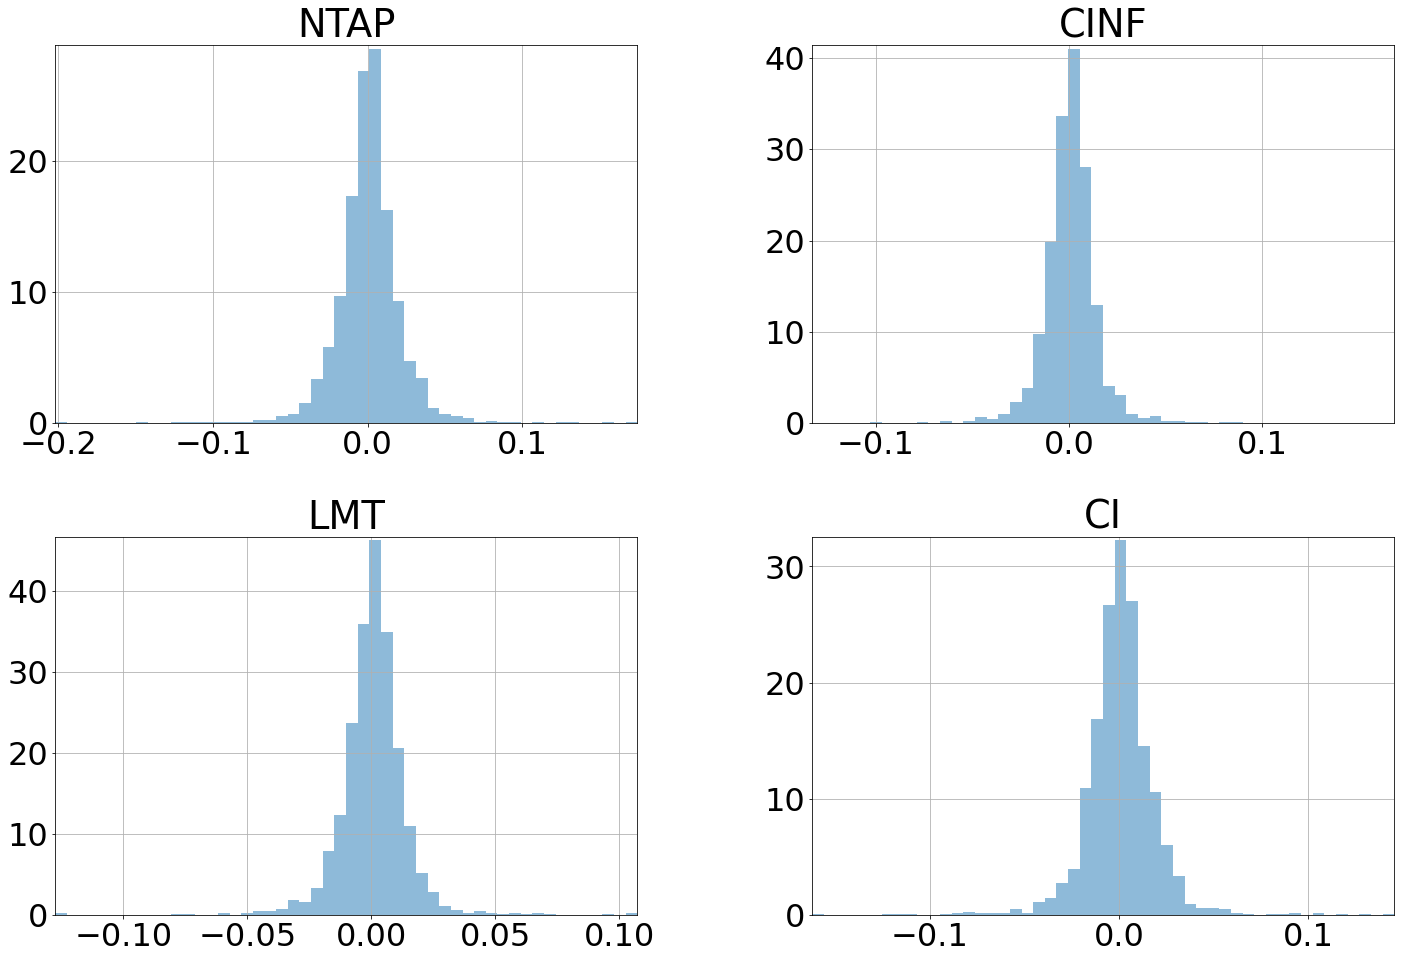

In [52]:
fig, ax = plt.subplots(2,2, figsize = (24, 16))
price_change_data.hist(bins = 50,
                      alpha = 0.5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)

<ipython-input-46-7e0a0f920c92>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
<ipython-input-46-7e0a0f920c92>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y)) + "%" for y in y_vals])


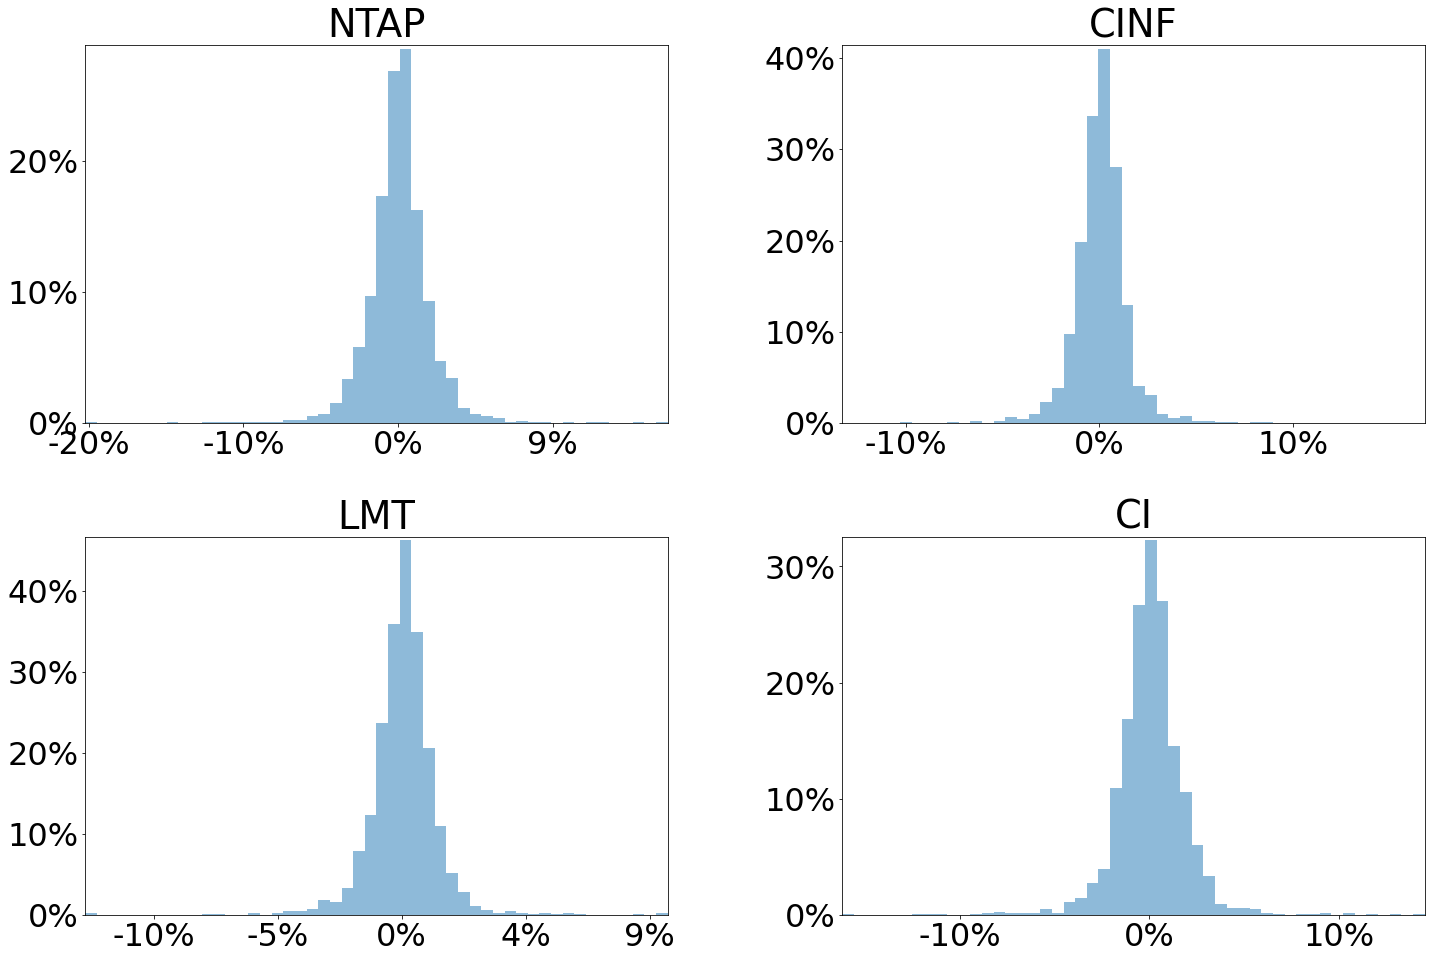

In [46]:
fig, ax = plt.subplots(2,2, figsize = (24, 16))
price_change_data.hist(bins = 50,
                      alpha = 0.5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)
#transform axis tick labels
for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]
        #stock = a.get_title()
        #a.set_title(stock)
        
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y)) + "%" for y in y_vals])
        a.grid(False)

<ipython-input-60-1c41d42747db>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
<ipython-input-60-1c41d42747db>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y)) + "%" for y in y_vals])


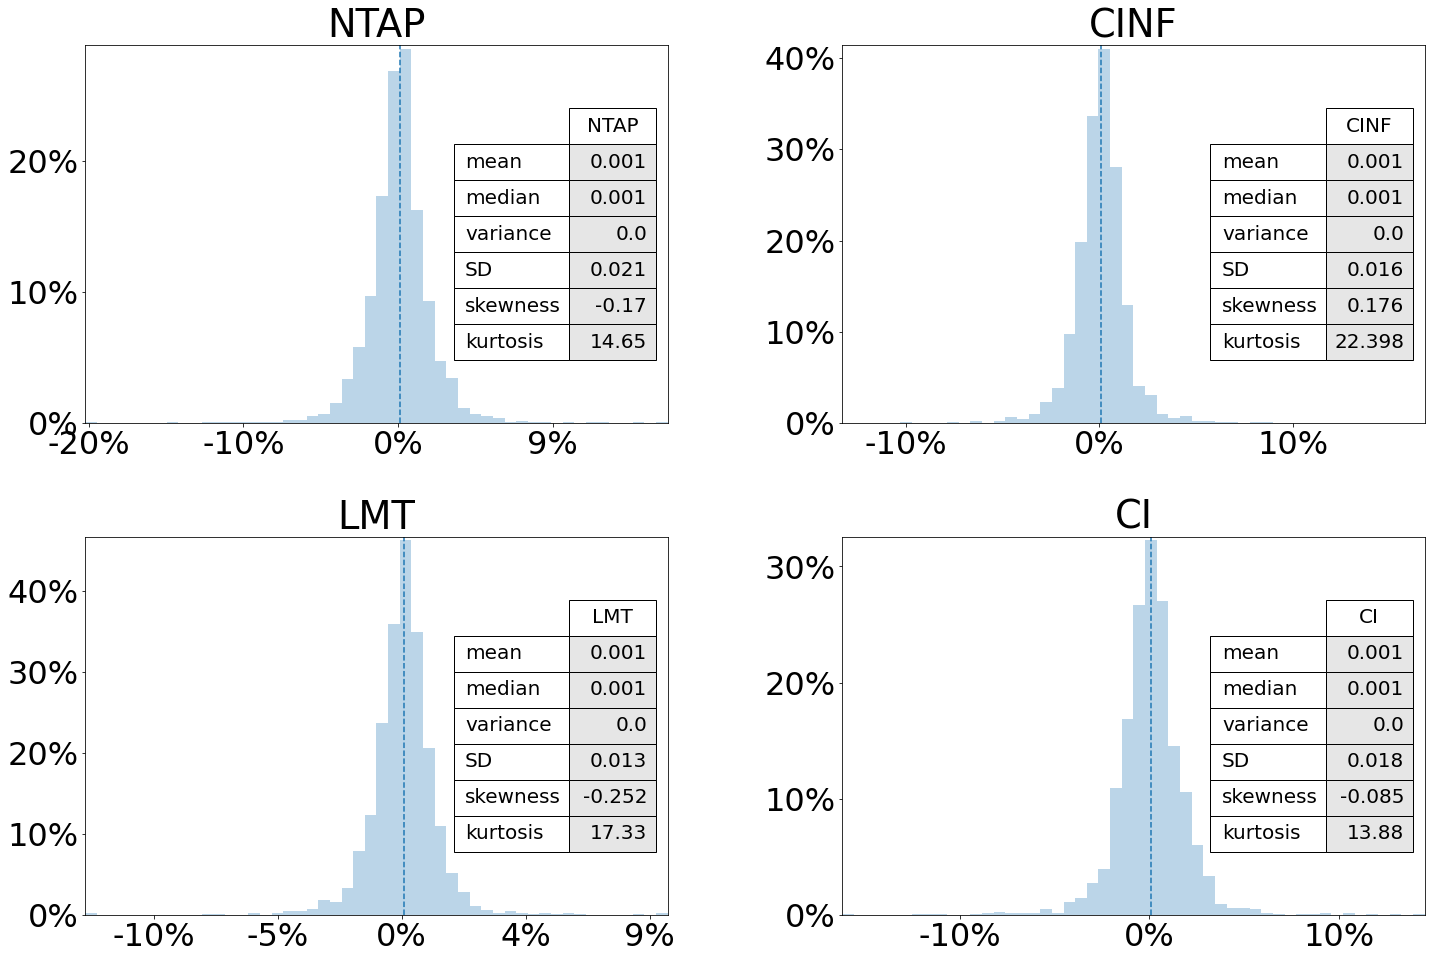

In [60]:
from pandas.plotting import table

fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, 
                       alpha = .3, 
                       label = price_change_data.keys(), 
                       ax = ax, 
                       density = True)

# plot table with summary statistics
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # select hist plot for each stock
        a = ax[i][j]
        stock = a.get_title()
        
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y)) + "%" for y in y_vals])
        a.grid(False)
        
        
        hist_data = stats_df[stock] 
        stats = table(a, 
                      hist_data, 
                      colWidths=[.1], 
                      cellColours=[[(.9,.9,.9)]]*6, 
                      loc = "center right")
        stats.scale(1.5,3)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        a.axvline(x = hist_data.loc["mean"], ls="--")
        
plt.show()

<ipython-input-62-7eaca0c6f34b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
<ipython-input-62-7eaca0c6f34b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y)) + "%" for y in y_vals])


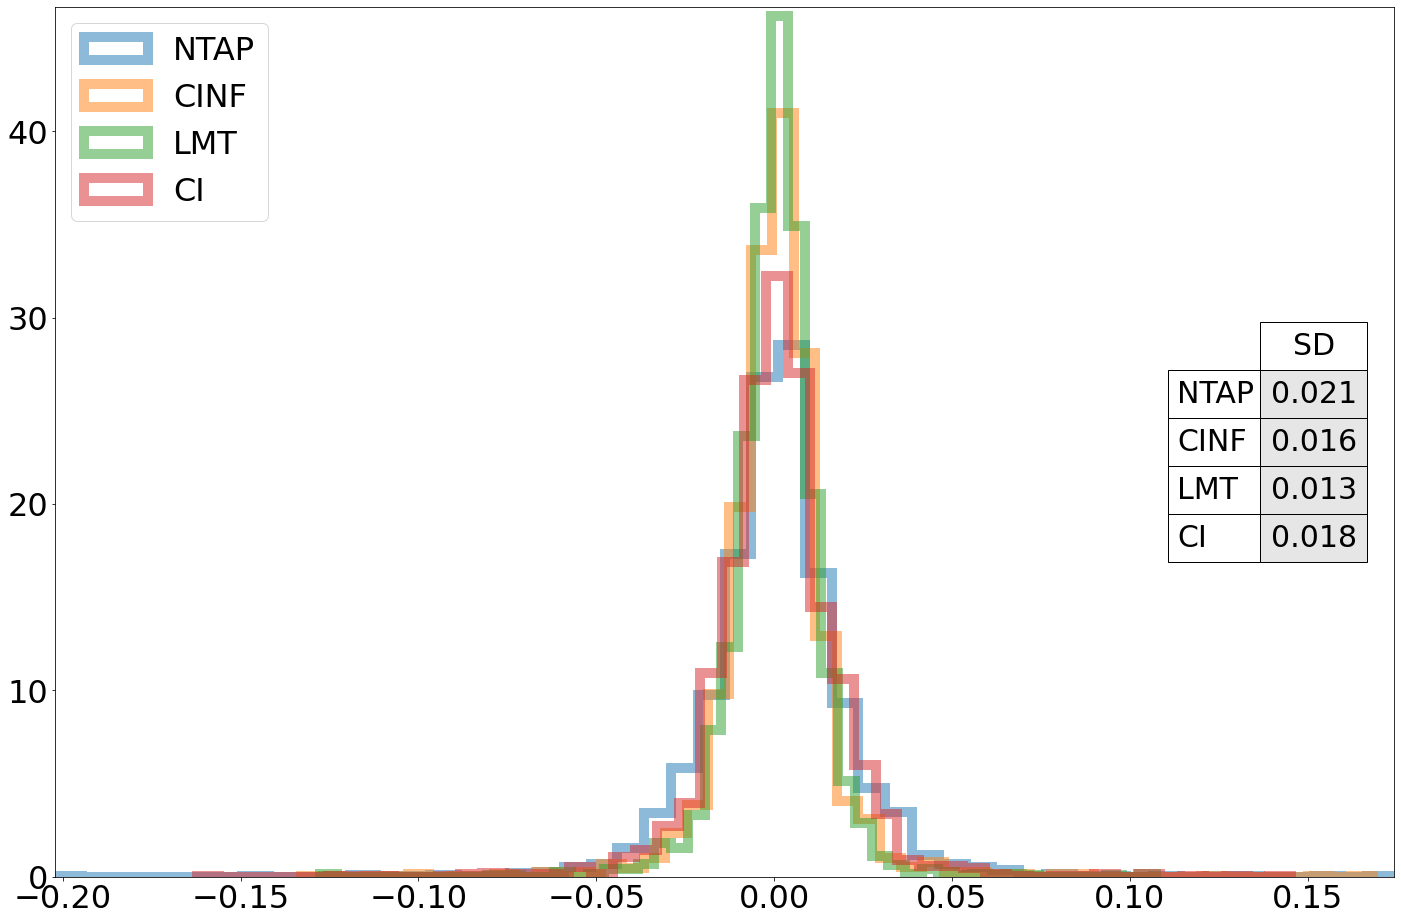

In [62]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, 
                                histtype = "step", 
                                alpha = .5, 
                                label = key, 
                                linewidth = 10, 
                                density = True)
    
x_vals = a.get_xticks()
a.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
y_vals = a.get_yticks()
a.set_yticklabels([str(int(y)) + "%" for y in y_vals])

stats = table(ax, stats_df.loc["SD"], colWidths = [.1],cellColours = [[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)
    
plt.legend()

<ipython-input-64-8690b2c4f5c1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
<ipython-input-64-8690b2c4f5c1>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y)) + "%" for y in y_vals])


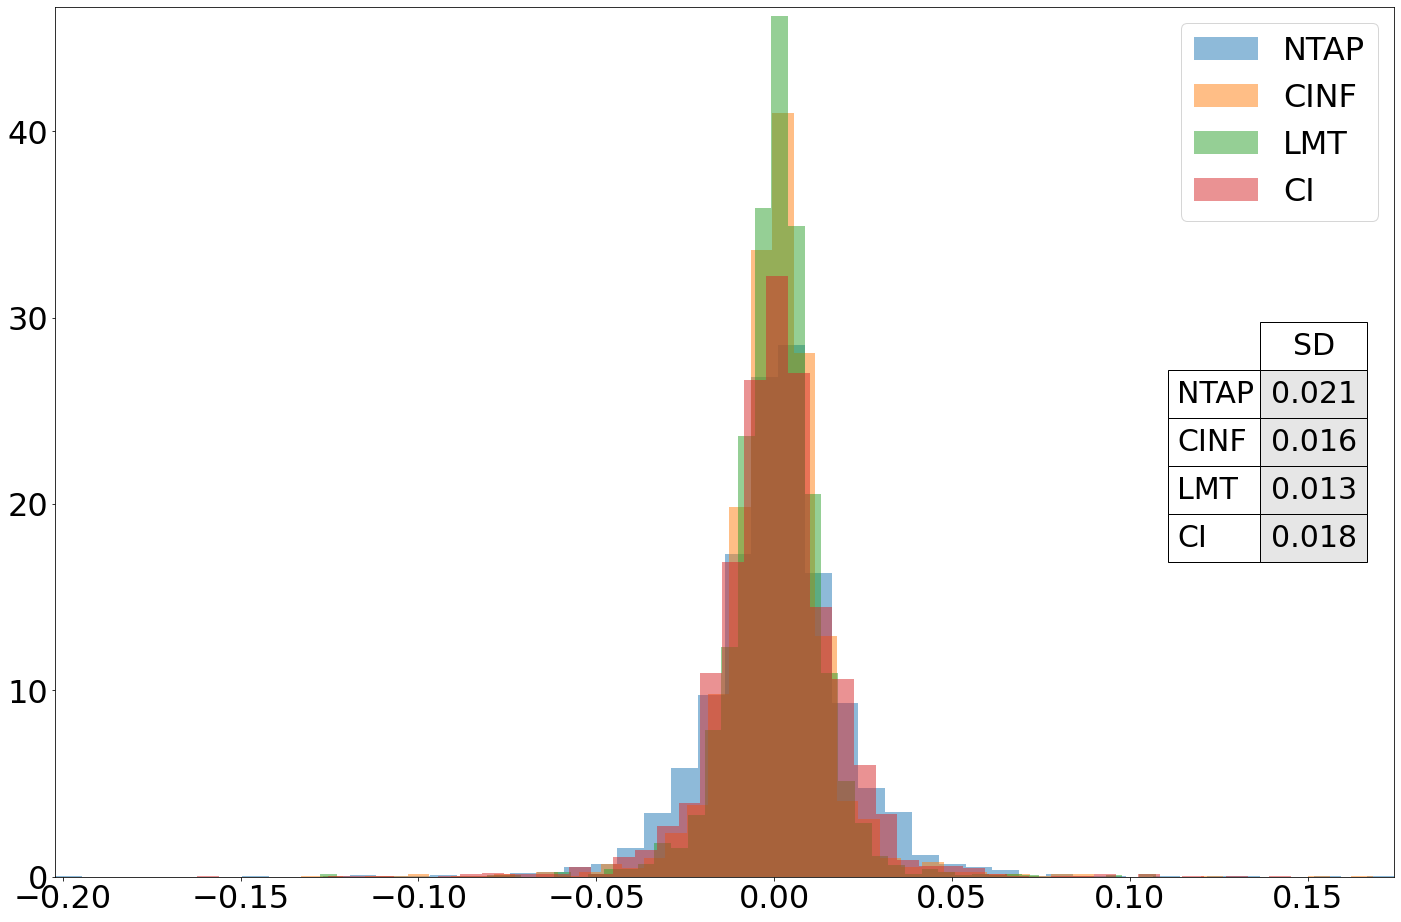

In [64]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, 
                                alpha = .5, 
                                label = key, 
                                linewidth = 10, 
                                density = True)

x_vals = a.get_xticks()
a.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
y_vals = a.get_yticks()
a.set_yticklabels([str(int(y)) + "%" for y in y_vals])

stats = table(ax, 
              stats_df.loc["SD"], 
              colWidths = [.1],
              cellColours = [[(.9,.9,.9)]]*4, 
              loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()